In [1]:
from api import WeatherApi
from gpx import GPXParser

import matplotlib.pyplot as plt
import sklearn as sk
import pandas as pd
import pickle as pkl

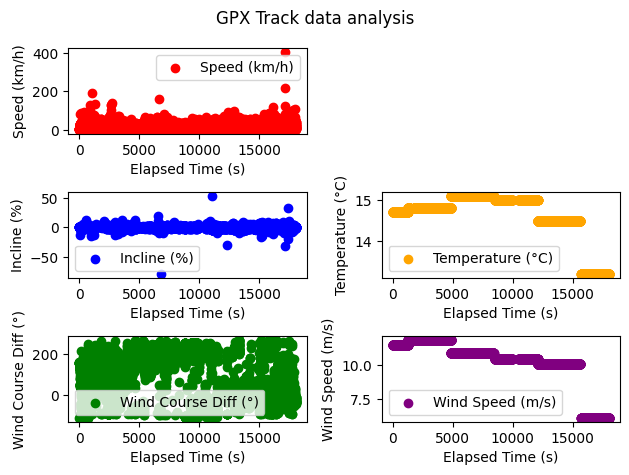

Average speed: 20.33 km/h
Max speed: 406.40 km/h
Average incline: 0.03 %
Total distance: 76057.23 m


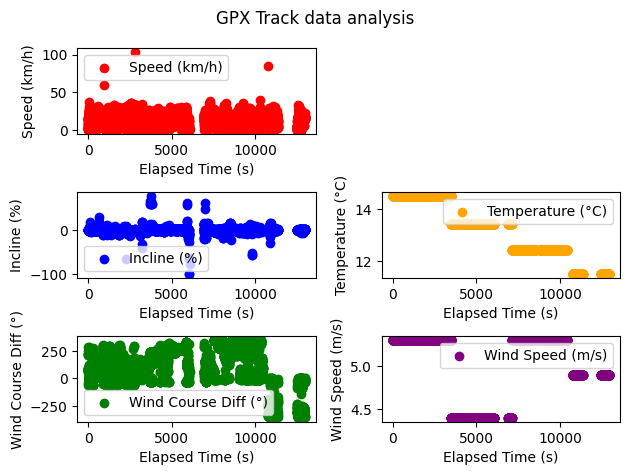

Average speed: 16.90 km/h
Max speed: 103.56 km/h
Average incline: 0.10 %
Total distance: 44110.00 m


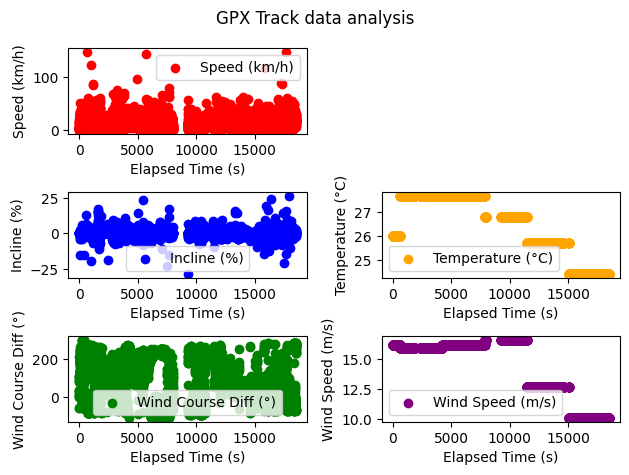

Average speed: 18.99 km/h
Max speed: 148.61 km/h
Average incline: 0.04 %
Total distance: 70277.19 m


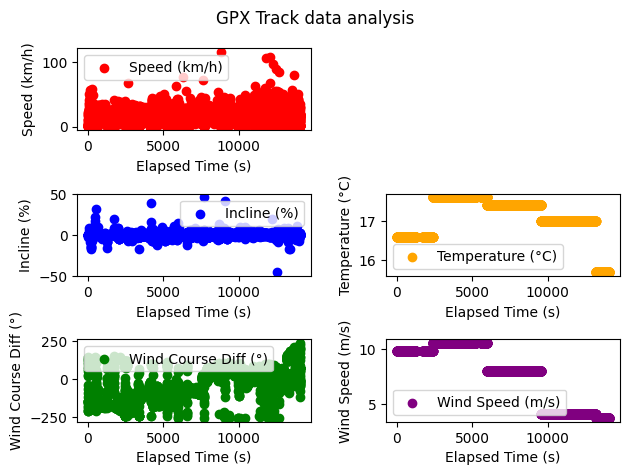

Average speed: 20.53 km/h
Max speed: 116.21 km/h
Average incline: 0.12 %
Total distance: 65832.44 m


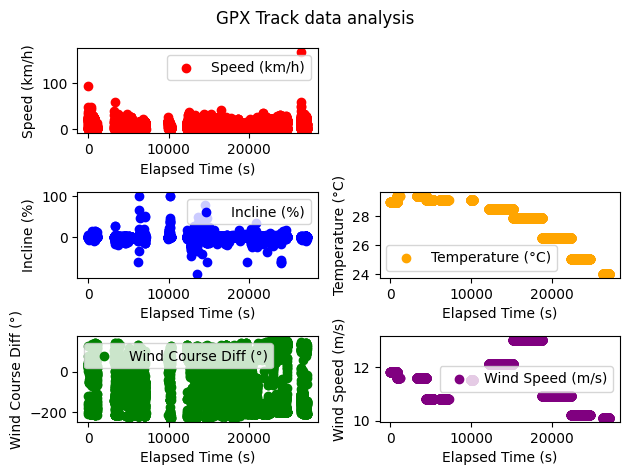

Average speed: 13.30 km/h
Max speed: 168.45 km/h
Average incline: 0.07 %
Total distance: 48150.10 m


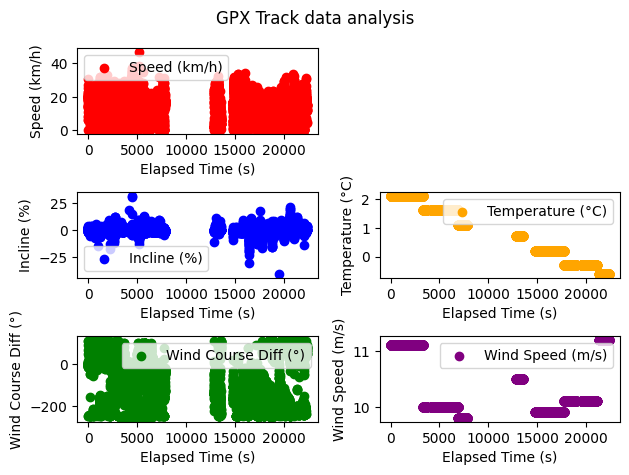

Average speed: 16.11 km/h
Max speed: 46.92 km/h
Average incline: 0.08 %
Total distance: 56238.74 m


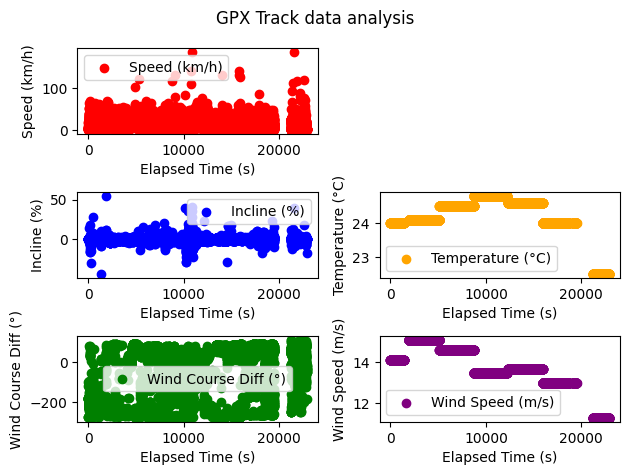

Average speed: 20.00 km/h
Max speed: 185.43 km/h
Average incline: 0.16 %
Total distance: 89312.02 m


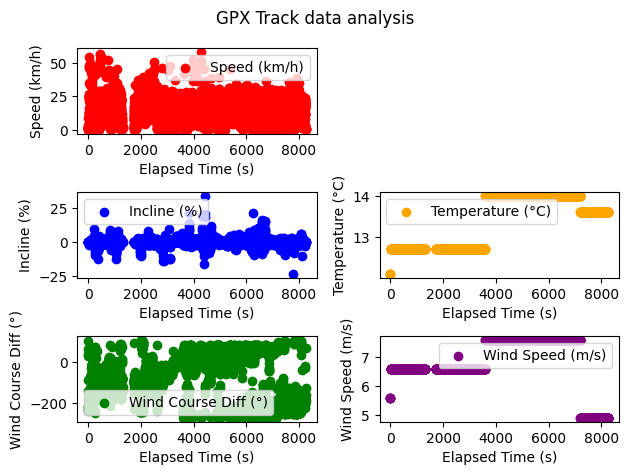

Average speed: 16.75 km/h
Max speed: 57.97 km/h
Average incline: 0.07 %
Total distance: 27070.12 m


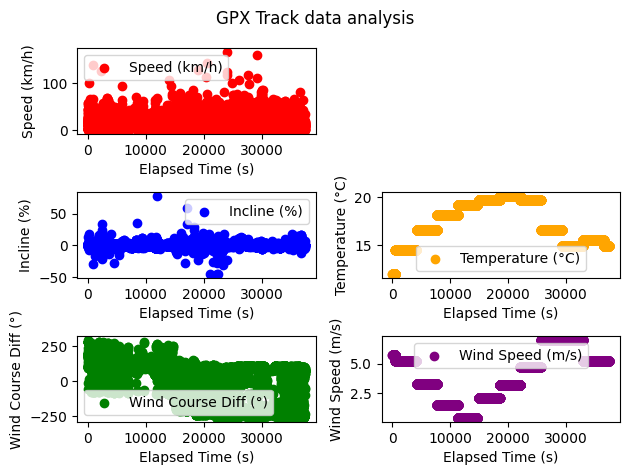

Average speed: 19.25 km/h
Max speed: 166.43 km/h
Average incline: 0.13 %
Total distance: 149052.87 m


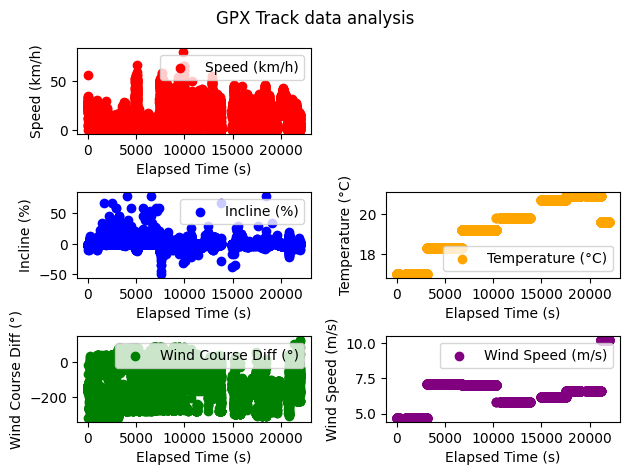

Average speed: 17.19 km/h
Max speed: 80.14 km/h
Average incline: 1.89 %
Total distance: 79676.21 m


In [ ]:
api = WeatherApi()
parser = GPXParser(api)

tracks = parser.parse_gpx_dir("data")
for track in tracks:
    name = track["filename", 0]
    GPXParser.plot_gpx(track)

data = pd.concat(tracks, ignore_index=True)

Feature importances: [0.28477275 0.39376048 0.06299369 0.2157152  0.04275788]


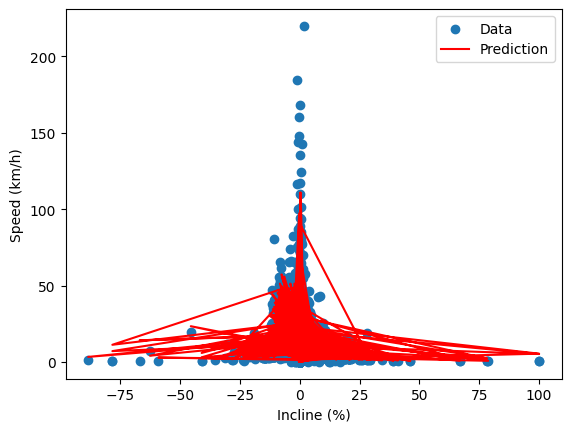

Mean Squared Error: 10.06
R^2 Score: 0.89


In [8]:
model = sk.ensemble.RandomForestRegressor(n_estimators=100)
X = data[["incline", "elapsed_time", "temperature", "wind_course_diff", "wind_speed"]]
y = data["speed"]

X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(
    X.values, y, test_size=0.2
)

model.fit(X_train, y_train)
model.score(X_test, y_test)

print("Feature importances:", model.feature_importances_)
plt.scatter(X_test[:, 0], y_test, label="Data")
plt.plot(X_test[:, 0], model.predict(X_test), color="red", label="Prediction")
plt.xlabel("Incline (%)")
plt.ylabel("Speed (km/h)")
plt.legend()
plt.show()

y_pred = model.predict(X.values)
mse = sk.metrics.mean_squared_error(y, y_pred)
r2 = sk.metrics.r2_score(y, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

In [ ]:
with open("model.pkl", "wb") as f:
    pkl.dump(regressor, f)